# Case Classificando bebidas

Será que é possível classificarmos o tipo de bebida dado alguns atributos como volume, quantidade de calorias e quantidade de cafeína?

Na aula de hoje vamos explorar o dataset caffeine para construirmos um classificador com base em modelos de árvores.

## Atributos
**bebida:** nome da bebida.

**Volume (ml):** Quantidade em volume.

**Calorias:** Quantidade de calorias.

**Cafeína(mg):** Quantidade de cafeína.

**tipo:** tipo de bebida. (Café, Bebidas Energéticas, Shots Energéticos, Refrigerantes, Chá, Água)

In [8]:
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sns                    
import numpy as np                        

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [3]:
dados_path = './caffeine.csv'

dados = pd.read_csv(dados_path)

In [5]:
print(dados.shape)
dados.head()

(610, 5)


,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [7]:
dados.isna().sum()

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

Tipos dados e valores nulos ok

# Exploração dos dados

<AxesSubplot:xlabel='Volume (ml)', ylabel='Count'>

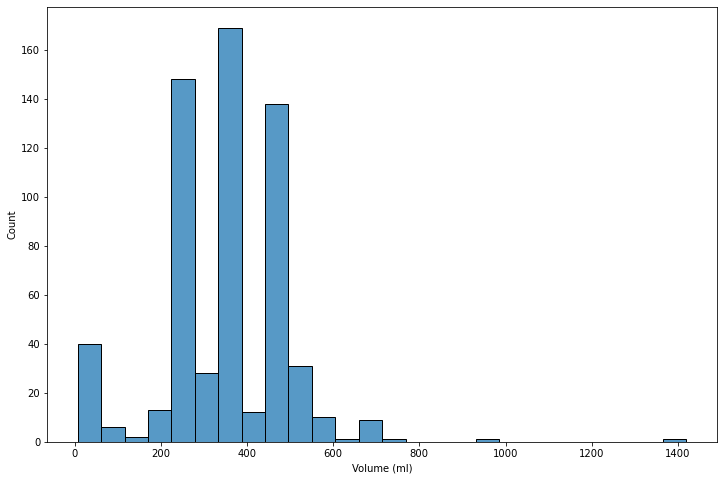

In [12]:
plt.figure(figsize=(12,8))

sns.histplot(dados, x='Volume (ml)')

<AxesSubplot:xlabel='Calories', ylabel='Count'>

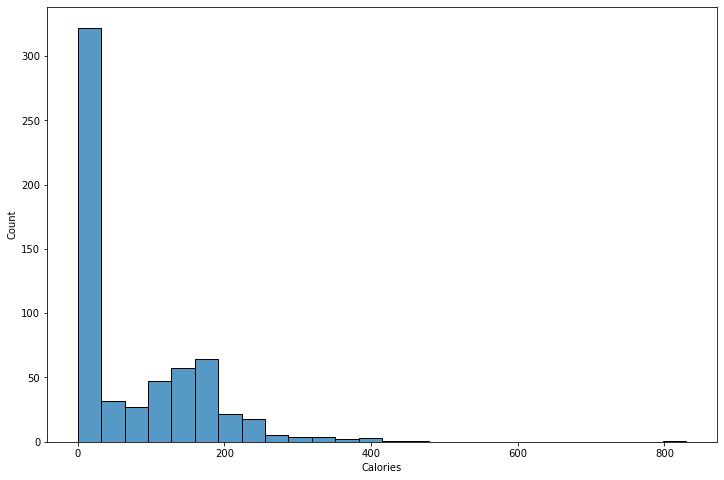

In [13]:
plt.figure(figsize=(12,8))

sns.histplot(dados, x='Calories')

<AxesSubplot:xlabel='Caffeine (mg)', ylabel='Count'>

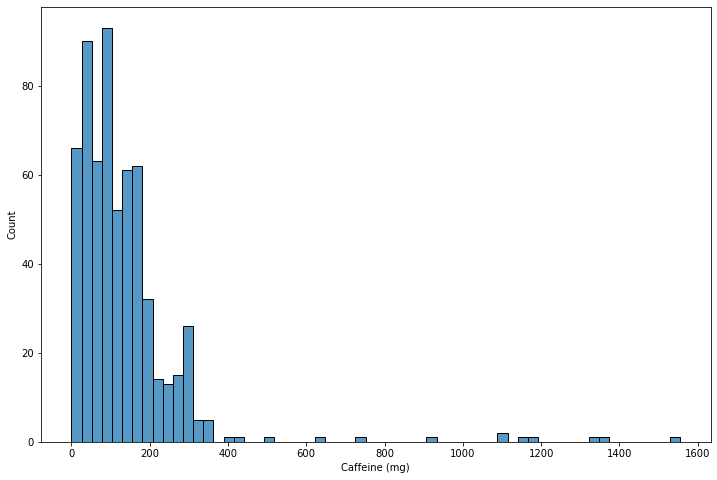

In [14]:
plt.figure(figsize=(12,8))

sns.histplot(dados, x='Caffeine (mg)')

<Figure size 1584x1584 with 0 Axes>

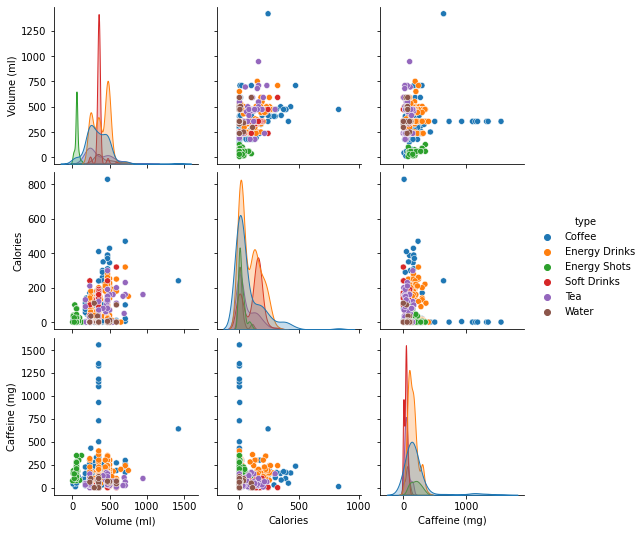

In [23]:
plt.figure(figsize=(22,22))

sns.pairplot(dados, vars=['Volume (ml)','Calories','Caffeine (mg)'], hue='type')

plt.show()

# Criando modelo

## DecisionTree

In [24]:
x = dados.drop(columns=['type','drink'])

y = dados['type']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7, stratify=y)

In [26]:
dt = DecisionTreeClassifier(random_state=7, max_depth=3)

In [27]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [28]:
y_pred_dt = dt.predict(x_test)

print(y_pred_dt)

['Energy Drinks' 'Energy Shots' 'Energy Drinks' 'Tea' 'Energy Drinks'
 'Energy Drinks' 'Soft Drinks' 'Soft Drinks' 'Energy Drinks'
 'Energy Drinks' 'Energy Drinks' 'Coffee' 'Coffee' 'Tea' 'Energy Shots'
 'Energy Drinks' 'Energy Drinks' 'Energy Drinks' 'Soft Drinks'
 'Soft Drinks' 'Coffee' 'Energy Drinks' 'Coffee' 'Energy Drinks'
 'Energy Shots' 'Energy Drinks' 'Coffee' 'Energy Drinks' 'Tea'
 'Energy Drinks' 'Energy Drinks' 'Tea' 'Energy Drinks' 'Tea' 'Coffee'
 'Energy Drinks' 'Soft Drinks' 'Energy Drinks' 'Soft Drinks' 'Coffee'
 'Coffee' 'Coffee' 'Energy Shots' 'Tea' 'Soft Drinks' 'Tea'
 'Energy Drinks' 'Coffee' 'Energy Drinks' 'Energy Drinks' 'Tea'
 'Energy Drinks' 'Tea' 'Soft Drinks' 'Coffee' 'Coffee' 'Soft Drinks'
 'Energy Shots' 'Energy Drinks' 'Coffee' 'Soft Drinks' 'Coffee' 'Tea'
 'Energy Drinks' 'Coffee' 'Energy Drinks' 'Energy Drinks' 'Soft Drinks'
 'Energy Shots' 'Tea' 'Soft Drinks' 'Coffee' 'Energy Drinks' 'Tea' 'Tea'
 'Energy Drinks' 'Soft Drinks' 'Energy Drinks' 'Energy Dri

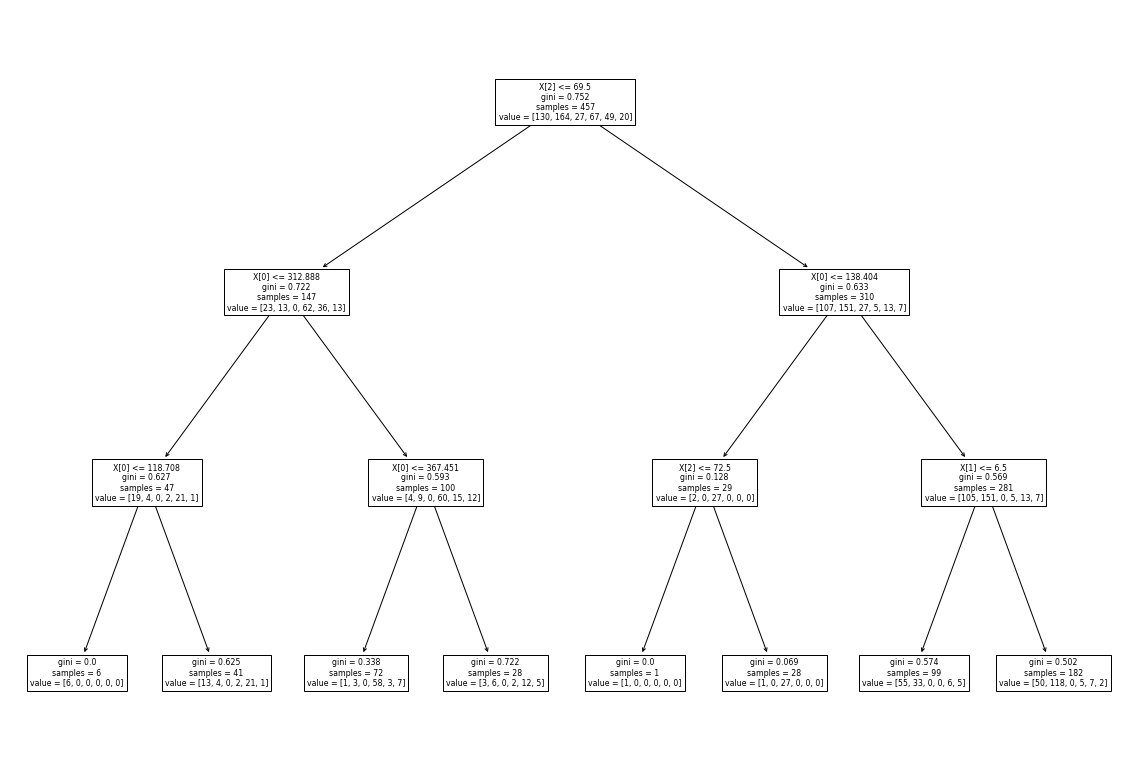

In [32]:
plt.figure(figsize=(20,14))

tree.plot_tree(dt)

plt.show()

In [37]:
dt.feature_names_in_

array(['Volume (ml)', 'Calories', 'Caffeine (mg)'], dtype=object)

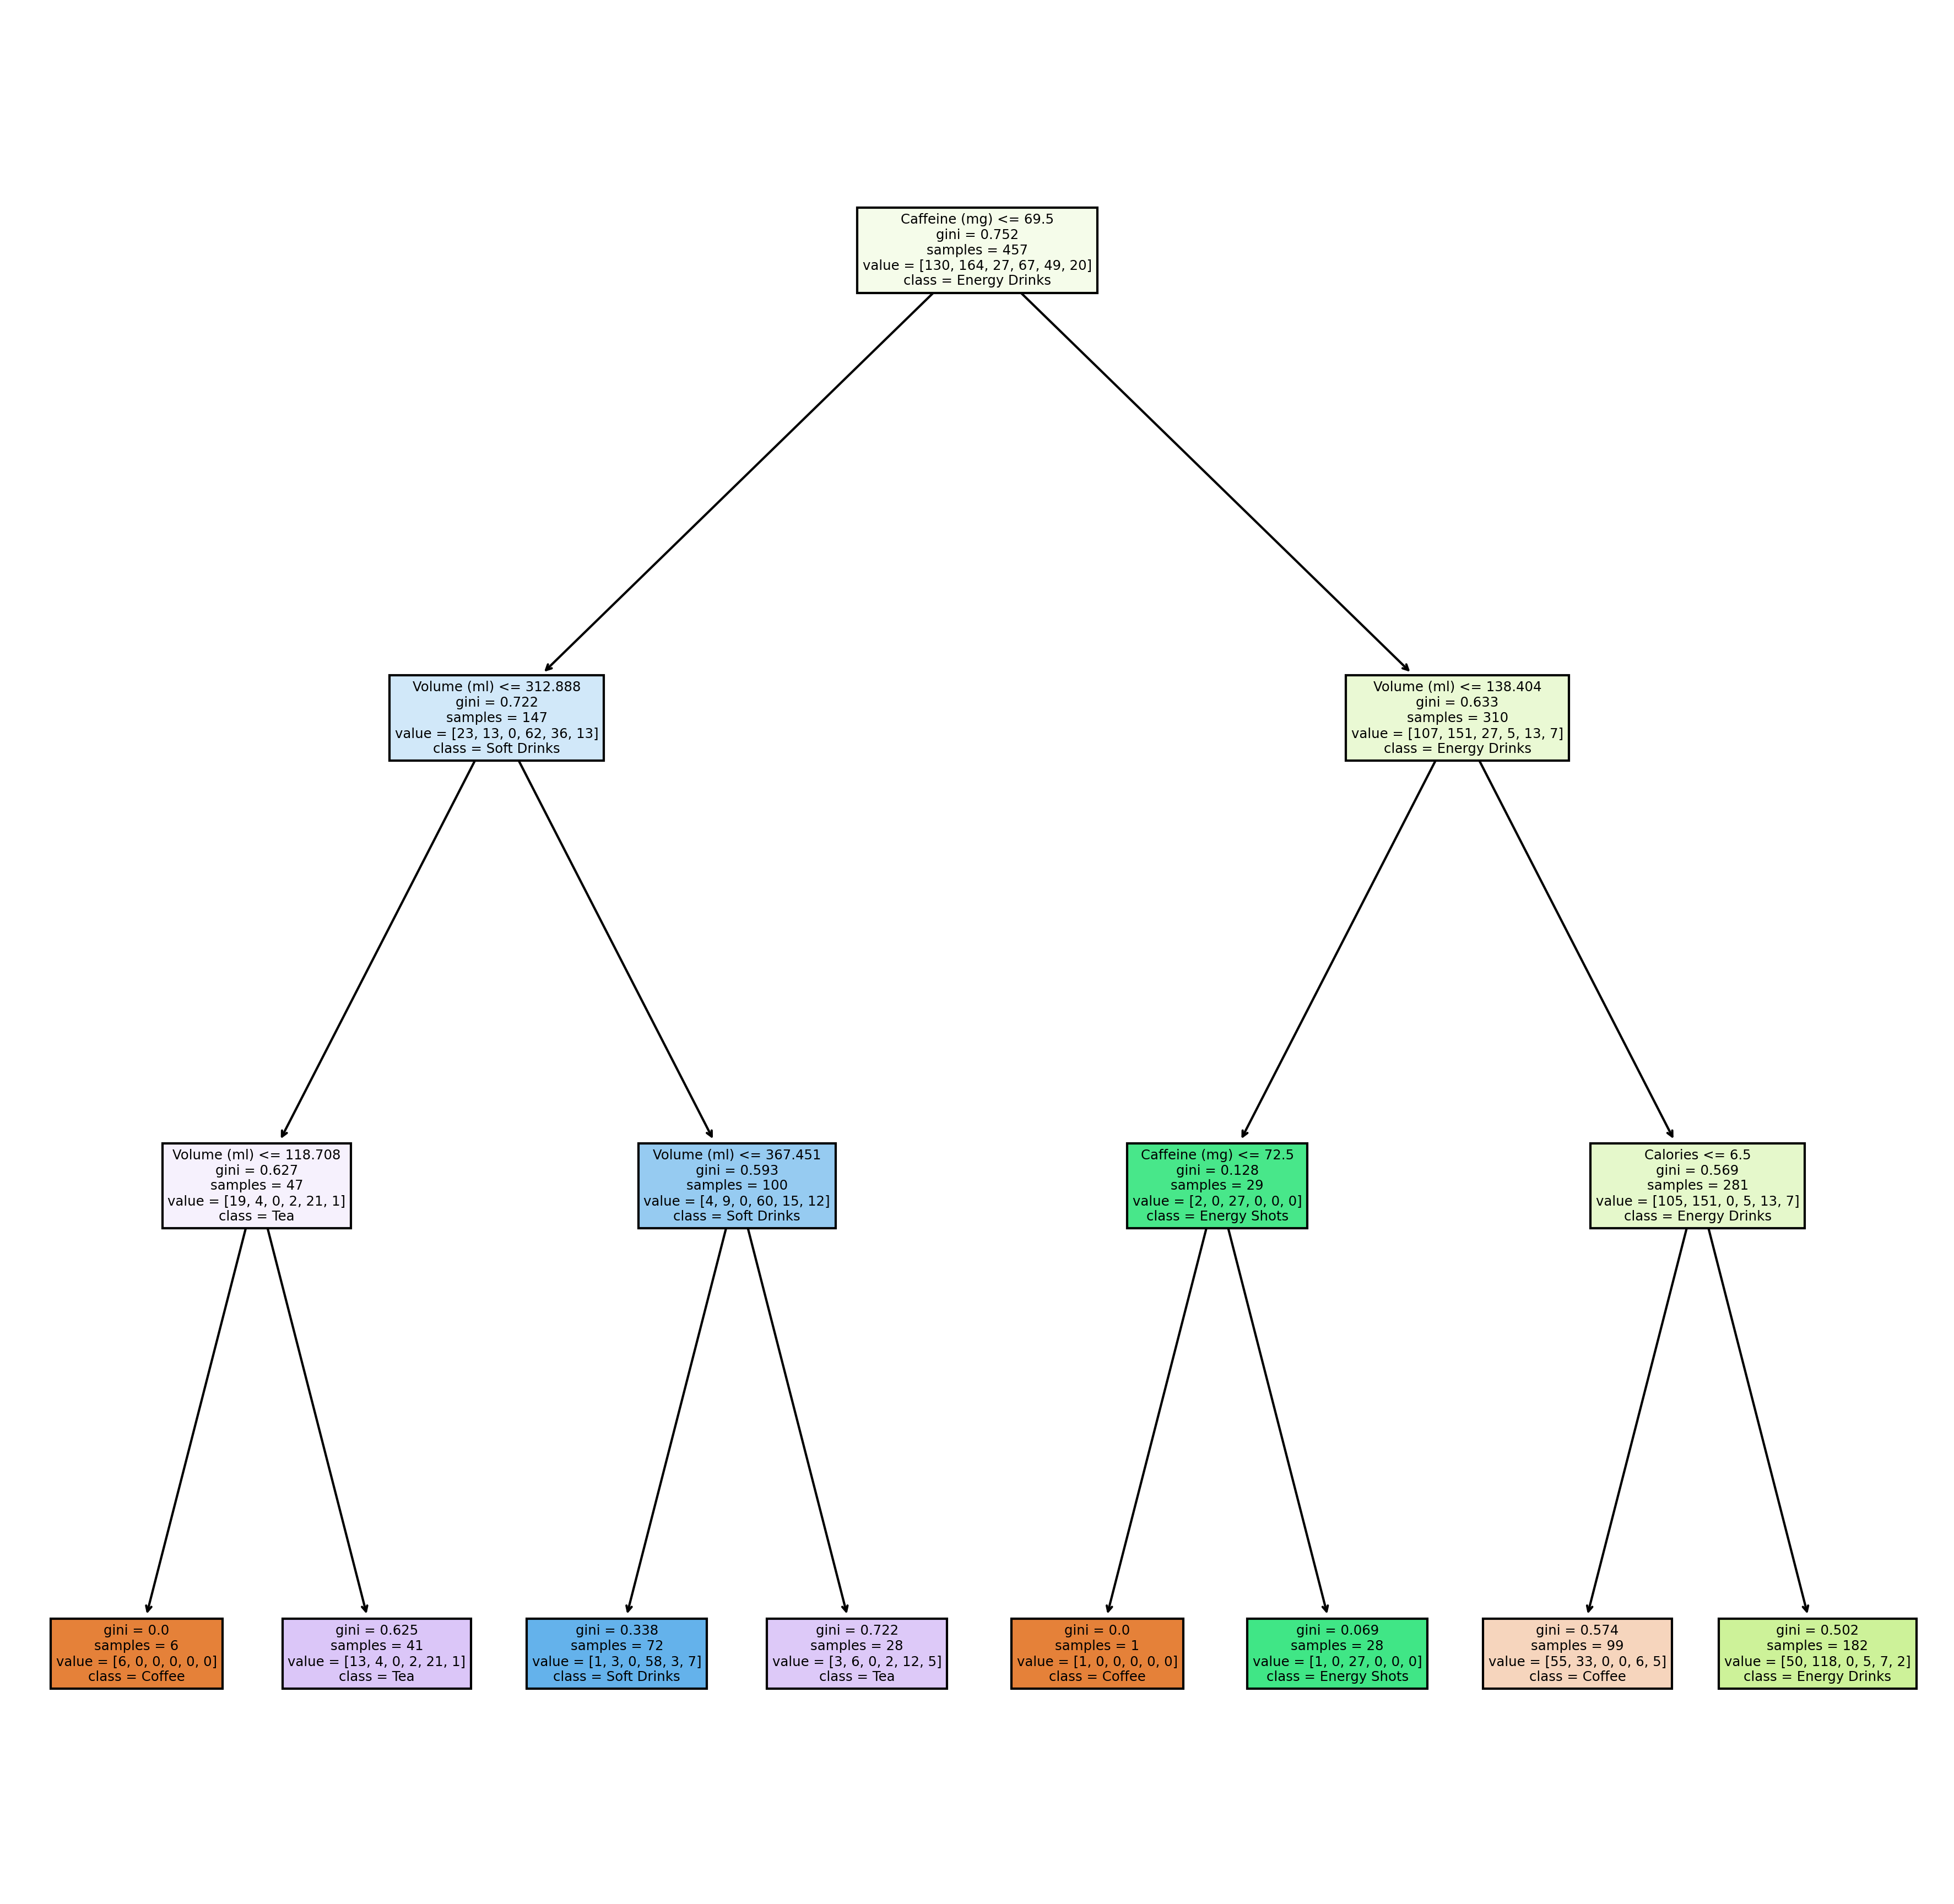

In [38]:
class_names = list(dt.classes_)
label_names = list(dt.feature_names_in_)

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(dt,
               feature_names=label_names,
               class_names=class_names,
               filled=True)

plt.show()

fig.savefig('./dt_classify_drinks.png')

In [39]:
print(accuracy_score(y_test, y_pred_dt))

0.6797385620915033


In [40]:
print(confusion_matrix(y_test, y_pred_dt))

[[17 17  2  0  7  0]
 [10 44  0  0  1  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  2  0]
 [ 2  1  0  1 13  0]
 [ 2  0  0  2  2  0]]


In [41]:
print(dados.type.value_counts())

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64


Se as variáveis target do seu modelo de decision tree não estão equilibradas, isso pode afetar a precisão e a acurácia do seu modelo, especialmente se a classe minoritária é importante para o seu problema.

Utilize algoritmos que são robustos a desequilíbrios de classe: Alguns algoritmos de machine learning são projetados para serem robustos a desequilíbrios de classe. Alguns exemplos incluem o **Random Forests**.

Existem algumas técnicas que podem ser usadas para equilibrar classes com um modelo de Random Forest. Duas abordagens comuns são o ajuste do parâmetro **class_weight** e a aplicação de técnicas de reamostragem.

O parâmetro class_weight permite atribuir pesos diferentes às classes no modelo de Random Forest. Ele pode ser ajustado para dar mais peso às classes minoritárias, ajudando a equilibrar o modelo. Você pode definir o valor do parâmetro "class_weight" como **"balanced"**, o que fará com que o modelo ajuste automaticamente os pesos de acordo com a frequência de cada classe.

Técnicas de reamostragem:
Outra abordagem comum é usar técnicas de reamostragem, como oversampling e undersampling, para equilibrar as classes. Oversampling envolve a duplicação ou triplicação de observações da classe minoritária, enquanto undersampling envolve a redução do número de observações da classe majoritária. Isso ajuda a garantir que o modelo seja treinado com um número igual de observações para cada classe.

Você pode experimentar essas técnicas individualmente ou combiná-las para obter melhores resultados em termos de equilíbrio de classes em seu modelo de Random Forest. É importante lembrar que o ajuste correto de hiperparâmetros é fundamental para obter bons resultados em qualquer modelo de machine learning.

## RandomForest com ClassWeight

In [42]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=80, max_depth=7, class_weight='balanced', random_state=7)

rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=80, random_state=7)

In [43]:
y_pred_rf = rf.predict(x_test)

print(y_pred_rf)

['Energy Drinks' 'Energy Shots' 'Energy Drinks' 'Soft Drinks' 'Coffee'
 'Coffee' 'Soft Drinks' 'Soft Drinks' 'Energy Drinks' 'Coffee'
 'Energy Drinks' 'Energy Drinks' 'Coffee' 'Coffee' 'Energy Shots'
 'Energy Drinks' 'Energy Drinks' 'Coffee' 'Soft Drinks' 'Soft Drinks'
 'Energy Drinks' 'Energy Drinks' 'Coffee' 'Energy Drinks' 'Energy Shots'
 'Energy Drinks' 'Coffee' 'Energy Drinks' 'Coffee' 'Coffee'
 'Energy Drinks' 'Tea' 'Energy Drinks' 'Tea' 'Energy Drinks' 'Coffee'
 'Water' 'Energy Drinks' 'Soft Drinks' 'Water' 'Tea' 'Energy Drinks'
 'Energy Shots' 'Tea' 'Soft Drinks' 'Tea' 'Energy Drinks' 'Coffee'
 'Energy Drinks' 'Energy Drinks' 'Tea' 'Energy Drinks' 'Coffee'
 'Soft Drinks' 'Energy Drinks' 'Water' 'Soft Drinks' 'Energy Shots'
 'Energy Drinks' 'Coffee' 'Soft Drinks' 'Coffee' 'Tea' 'Energy Drinks'
 'Water' 'Energy Drinks' 'Energy Drinks' 'Water' 'Energy Shots' 'Tea'
 'Soft Drinks' 'Coffee' 'Energy Drinks' 'Coffee' 'Tea' 'Energy Drinks'
 'Soft Drinks' 'Energy Drinks' 'Energy Drinks' 

In [45]:
print(accuracy_score(y_test, y_pred_rf))

print(confusion_matrix(y_test, y_pred_rf))

0.7320261437908496
[[24 12  2  0  4  1]
 [ 5 48  0  0  1  1]
 [ 0  0  9  0  0  0]
 [ 1  0  0 17  1  4]
 [ 5  1  0  1 10  0]
 [ 0  0  0  1  1  4]]


In [46]:
print (rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.8862144420131292
0.7320261437908496


## RandomForest com ClassWeight e Oversampling

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

In [53]:
print(x_train.shape)
print(x_train_os.shape)

(457, 3)
(984, 3)


In [54]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=80, max_depth=7, class_weight='balanced', random_state=7)

rf.fit(x_train_os, y_train_os)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=80, random_state=7)

In [55]:
estimator_rf = rf.estimators_

In [57]:
y_pred_rf = rf.predict(x_test)

print(y_pred_rf)

['Energy Drinks' 'Energy Shots' 'Energy Drinks' 'Soft Drinks' 'Coffee'
 'Coffee' 'Water' 'Soft Drinks' 'Energy Drinks' 'Coffee' 'Energy Drinks'
 'Energy Drinks' 'Coffee' 'Tea' 'Energy Shots' 'Coffee' 'Energy Drinks'
 'Coffee' 'Soft Drinks' 'Soft Drinks' 'Energy Drinks' 'Energy Drinks'
 'Coffee' 'Energy Drinks' 'Energy Shots' 'Energy Drinks' 'Coffee'
 'Energy Drinks' 'Coffee' 'Coffee' 'Energy Drinks' 'Tea' 'Energy Drinks'
 'Tea' 'Energy Drinks' 'Coffee' 'Water' 'Energy Drinks' 'Soft Drinks'
 'Water' 'Coffee' 'Energy Drinks' 'Energy Shots' 'Tea' 'Water' 'Tea'
 'Energy Drinks' 'Coffee' 'Energy Drinks' 'Energy Drinks' 'Tea'
 'Energy Drinks' 'Soft Drinks' 'Soft Drinks' 'Energy Drinks' 'Water'
 'Water' 'Energy Shots' 'Energy Drinks' 'Coffee' 'Soft Drinks' 'Coffee'
 'Tea' 'Energy Drinks' 'Water' 'Energy Drinks' 'Coffee' 'Water'
 'Energy Shots' 'Tea' 'Soft Drinks' 'Coffee' 'Energy Drinks' 'Coffee'
 'Tea' 'Energy Drinks' 'Soft Drinks' 'Energy Drinks' 'Energy Drinks'
 'Energy Drinks' 'Coffee' 'S

In [58]:
print(accuracy_score(y_test, y_pred_rf))

print(confusion_matrix(y_test, y_pred_rf))

0.7189542483660131
[[25 10  2  1  3  2]
 [ 6 47  0  0  1  1]
 [ 0  0  9  0  0  0]
 [ 0  0  0 14  1  8]
 [ 4  1  0  1 11  0]
 [ 0  0  0  1  1  4]]


In [59]:
print (rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.8555798687089715
0.7189542483660131
